In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

### Generating data

In [3]:
np.random.seed(123)

alpha, sigma = 1, 1
beta = [1, 2.5]

size = 100

X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

Text(0.5,0,'X2')

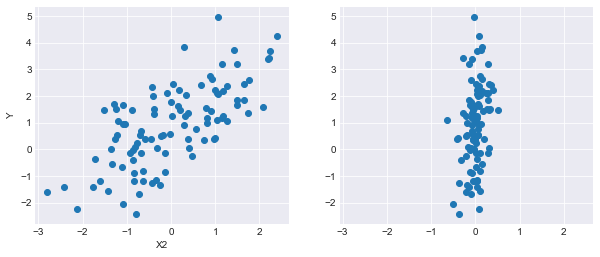

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))

axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)

axes[0].set_ylabel('Y')
axes[0].set_xlabel('X1')
axes[0].set_xlabel('X2')

### Model specification

In [5]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

/anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Running on PyMC3 v3.5


In [7]:
basic_model = pm.Model()

with basic_model:
    # priors for unknow model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    # expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2
    
    # likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [11]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 535.80it/s]  


{'alpha': array(0.9066009314912588),
 'beta': array([ 0.94848596,  2.60711845]),
 'sigma_log__': array(-0.03771372925085048),
 'sigma': array(0.962988576897385)}

In [12]:
with basic_model:
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:02<00:00, 961.57draws/s] 


In [15]:
trace['alpha'][-5:]

array([ 0.86038143,  0.88875012,  0.91392392,  0.99143432,  0.86691189])

In [16]:
with basic_model:
    step = pm.Slice()
    
    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:14<00:00, 770.33draws/s]


### Posterior analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f468898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1f50f978>]], dtype=object)

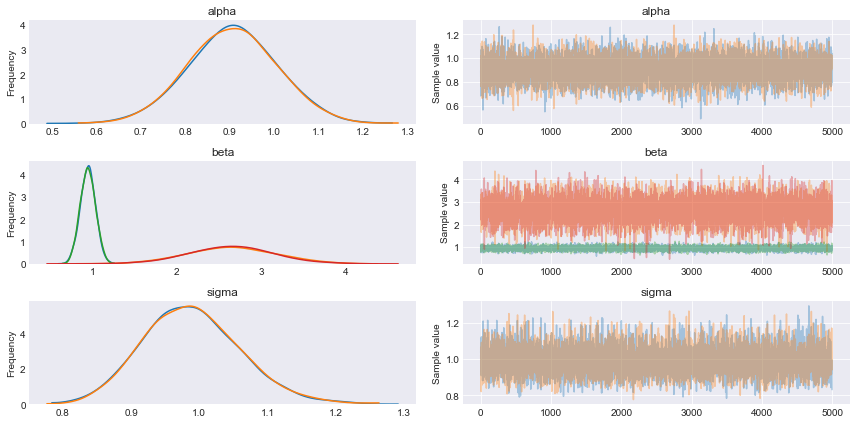

In [17]:
pm.traceplot(trace)

In [18]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.91,0.10,0.00,0.72,1.11,9283.21,1.0
beta__0,0.95,0.09,0.00,0.77,1.12,10340.59,1.0
beta__1,2.64,0.51,0.01,1.67,3.71,7468.93,1.0
sigma,0.99,0.07,0.00,0.85,1.12,8343.05,1.0
